In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output

data = pd.read_csv("indian_liver_patient.csv")
data['Gender'][data['Gender'] == 'Male'] = 1
data['Gender'][data['Gender'] == 'Female'] = 2
data['Gender'] = pd.to_numeric(data['Gender'])
for na in ['Albumin_and_Globulin_Ratio']:
    data[na].fillna(data[na].mean(), inplace = True)

/home/rakesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/rakesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


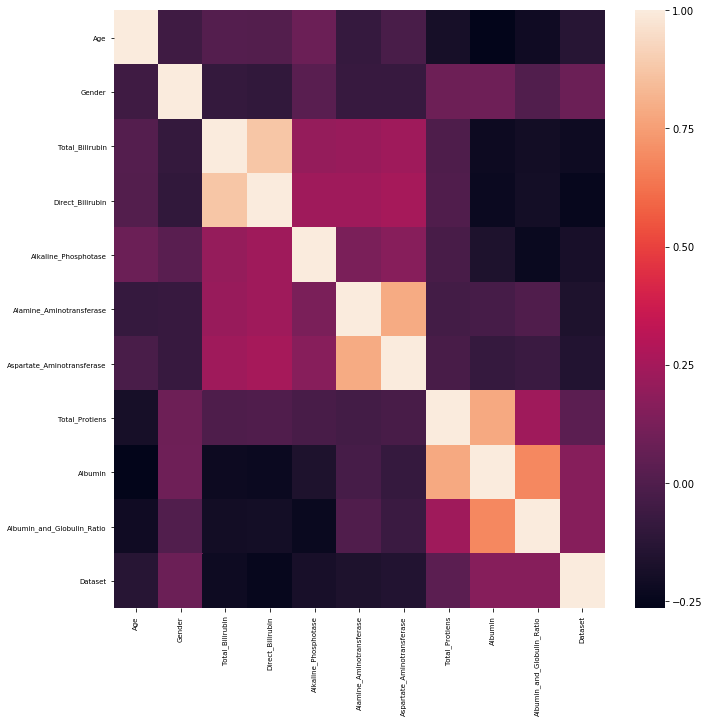

In [73]:
corr = data.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr)
plt.yticks(rotation=0, size=7)
plt.xticks(rotation=90, size=7)
plt.show()

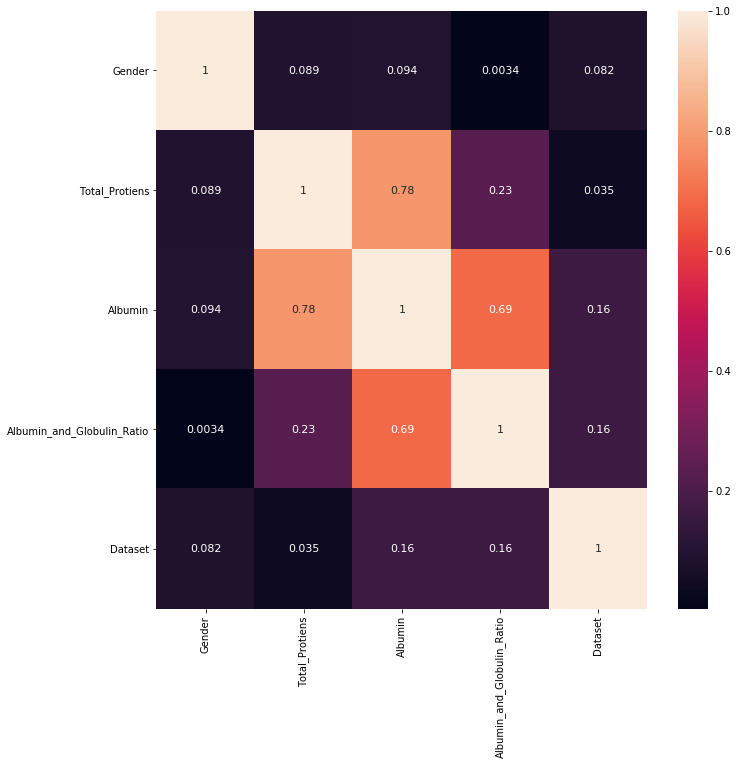

In [74]:
rel_vars = corr.Dataset[(corr.Dataset > 0.01)]
rel_cols = list(rel_vars.index.values)

corr2 = data[rel_cols].corr()
plt.figure(figsize=(11,11))
hm = sns.heatmap(corr2, annot=True, annot_kws={'size':11})
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

In [75]:
X = data[rel_cols[:-1]].iloc[:,0:].values
y = data.iloc[:, -1].values

In [76]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state = 0)

In [77]:
# Fit Random Forest on Training Set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

# Score model
regressor.score(X_train, y_train)

0.7662467747343554